> **In the previous [blog](https://medium.com/@omar.ok1998/what-is-dicom-a28c5fe24c9d)**, we introduced DICOM and learned about what it is and how important to understand how to deal with this kind of medical data if you are a biomedical engineer, healthcare data scientist, healthcare IT specialist, or a researcher.

> **In this blog**, we will use the **ImageIO** Python package to read DICOM files, extract **metadata** and **attributes**, and plot image slices using interactive slider widgets. While doing so, we have to understand some important DICOM attributes such as **Pixel Spacing**, **Shape**, **Slice Thickness**, and **Aspect Ratio**.

### **So… We will discuss the following:**
- What is DICOM in short?
- What does a DICOM object contain?
- Reading DICOM files using ImageIO.
- DICOM attributes, Metadata.
- How to access a specific DICOM attribute?
- Image representation using Matplotlib package.
- How to stack and read multiple slices?
- Understanding Pixel Spacing, Shape, Slice Thickness, Aspect Ratio, and the field of view.
- Building interactive image representation along the axial, coronal, and sagittal planes using Ipywidgets.

# **What is DICOM in Short?**
> DICOM, **Digital Imaging and Communications in Medicine**, is a set of standards that are created to allow communication across **multiple modalities** between multiple manufacturers so that all medical machines, that are **DICOM-compliant** of course, can speak the same language when sending information across a network. All you need is one piece of software, a DICOM reader, to read medical DICOM images from many different modalities.



# **What Does a DICOM Object Contain?**

> DICOM files usually have information other than just data of pixels. DICOM Standards provide a set of attributes to standardize the data stored in DICOM files. Each attribute has a specific data type (e.g. string, integer, float, etc.) with a fixed value representation. These attributes are called metadata. Examples of DICOM metadata:
-   ***Patient-related attributes:*** name, age, sex, etc.
-   ***Modality-related attributes:*** modality (CT, MRI, Ultrasound, etc.), manufacturer, acquisition date, etc.
-   **Image-related attributes:** shape, sampling, aspect ratio, pixel data, etc.

> ***Note*** that the image-related attributes I mentioned above are very important to understand as they are useful to implement real-world calculations on medical images. We will heavily rely on them down below. It's preferred that you understand what each represents.

> There are dozens of attributes that can characterize DICOM files. So, you cannot just read all of them. You need to focus only on the attributes that you might counter during your work on a DICOM-related thing. For this purpose, I highly recommend this great [DICOM Standard Browser](https://dicom.innolitics.com/ciods) which was built by [Innolitics](https://innolitics.com/). And if you want more details about data structures and encoding of the attributes, you can refer to this [link](https://dicom.nema.org/medical/dicom/2017a/output/chtml/part05/sect_6.2.html) that provides a list of Value Representation (VR) and its lenght.

>  **If you want to read more about DICOM and its services and more details, you can refer to this previous [blog](https://medium.com/@omar.ok1998/what-is-dicom-a28c5fe24c9d).**

> **Now let's get down to our business…** We will use python to easily surf DICOM files. We will focus on using the (ImageIO) package to present some of the basics about DICOM files that can be a handful for the next step when we will use the (PyDicom) package.

# **Let's code:**

First, let's import the required packages. We will use **(ImageIO)** to deal with DICOM files, **(NumPy)** as the pixel data are read as a NumPy-array, and **(matplotlib)** to visualize the images. An additional package **(Ipywidgets)** is also used to build an interactive slider that we can use to scroll among multiple image slices.

In [1]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imageio

## **DICOM Dataset:**

There are alot of DICOM samples on the internet. And you can use your own DICOM files. For this blog, I chose a [dataset](https://www.kaggle.com/datasets/dmisky/dlwptvolumetricdicomlung) of 99 slices of chest-CT scan for one patient. You can find it on Kaggle. I saved the dataset on my [Drive](https://drive.google.com/drive/folders/1dbJpXVUBn0mSUxgJIqKZj4d_0thSeTW3) so I can easily have access through GoogleColab.

## **Reading DICOM Files:**

You can easily read a DICOM file and store it in a variable using **(.imread)** from ImageIO package.

In [ ]:
#Reading a DICOM Image
im = imageio.imread('/content/drive/MyDrive/Datasets/Kaggle/DICOM/dicom_lung/000009.dcm')

### **DICOM Attributes:**

Using **(.meta)** outputs a dictionary that contains the attributes, the metadata, of this DICOM file.

In [ ]:
#DICOM Metadata
im.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.397047382026069586801778973091'),
      ('StudyDate', '20100227'),
      ('SeriesDate', '20100227'),
      ('AcquisitionDate', '20100227'),
      ('ContentDate', '20100227'),
      ('StudyTime', '161937.171'),
      ('SeriesTime', '162536.14 '),
      ('AcquisitionTime', '162208.162527 '),
      ('ContentTime', '162208.162527 '),
      ('Modality', 'CT'),
      ('Manufacturer', 'SIEMENS'),
      ('StudyDescription', 'CT CHEST W IV CONTRAST'),
      ('SeriesDescription', 'LUNG 3.0  B70f'),
      ('PatientName', 'C3N-00247'),
      ('PatientID', 'C3N-00247'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'F '),
      ('PatientAge', '077Y'),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.258626612405225511766549337110'),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.24

Since the metadata is stored as a **dictionary**, you can see the **keys**, the attributes' names, of the DICOM file:

In [ ]:
# The Attributes of the DICOM File
im.meta.keys()

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'AcquisitionDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'AcquisitionTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientAge', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])

**Note:** The attributes we see here might not be the whole attributes contained in this DICOM file. This is because ImageIO deals with DICOM images as light as possible. You can refer to this [link](https://github.com/imageio/imageio/blob/c57e31c90f17d32d1b0b1fe8d45a3f274776094d/imageio/plugins/_dicom.py#L29) to see the dictionary of attributes that ImageIO supports.

Accessing a specific attribute, "Modality" for example, can be done like the following:

In [ ]:
#The Modality Attribute
im.meta['Modality']

'CT'

### **Image Representation:**

Usually, the **"Pixel Data"** attribute has the values of pixels. Let's access this attribute just like before:

In [ ]:
# Access the Pixel Data attribute
im.meta['PixelData']

b'Data converted to numpy array, raw data removed to preserve memory'

As it says, the pixel values are stored as a **NumPy array**. And this is useful because NumPy is **suitable** for dealing with arrays and their calculation **fastly**. Now let's see the pixel values:

In [ ]:
im

Array([[ -985,  -990,  -999, ..., -1017, -1008,  -971],
       [-1016,  -984,  -963, ..., -1000, -1009,  -999],
       [-1024, -1008,  -996, ...,  -979, -1021,  -987],
       ...,
       [ -920,  -942,  -944, ...,  -893,  -917,  -955],
       [ -871,  -879,  -905, ...,  -895,  -869,  -867],
       [ -876,  -855,  -873, ...,  -933,  -982,  -936]], dtype=int16)

We only see a bunch of numbers where each number represents the pixel value in the [Hounsfield Unit (HU)](https://radiology.expert/x-ray-ct-technique/ct/hounsfield-units/) form. You can slice the image array using NumPy-array indices:

In [ ]:
#Slicing the first 5 rows and first 5 columns
im[0:5, 0:5]

Array([[ -985,  -990,  -999,  -982, -1011],
       [-1016,  -984,  -963,  -978, -1005],
       [-1024, -1008,  -996,  -969,  -992],
       [-1006,  -984,  -997,  -963, -1002],
       [ -970,  -988, -1006,  -992,  -999]], dtype=int16)

After understanding what **Pixel Data** represents, let's show the image of these pixels.

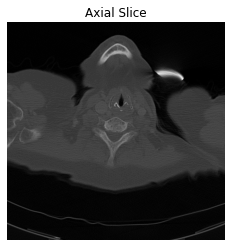

In [ ]:
#Show the image with gray color-map
plt.imshow(im, cmap='gray')
#Don't show tha axes
plt.axis('off')
#Add a title to the plot
plt.title('Axial Slice')
plt.show()

## **Multiple Slices:**

A DICOM file can have multiple frames that might be found stacked in the Pixel Data attribute. You can see that in DICOM files which have videos or colored images, RGB channels. Also, sometimes you find multiple DICOM files in one folder in which each DICOM file contains one frame, or slice, of the same patient. In this case, we have to stack these DICOM files ourselves. Fortunately, this is easily done using (.volread) from ImageIO.

In [2]:
#Stacking 99 slices
vol = imageio.volread('/content/drive/MyDrive/Datasets/Kaggle/DICOM/dicom_lung')

Reading DICOM (examining files): 1/99 files (1.0%)3/99 files (3.0%)4/99 files (4.0%)5/99 files (5.1%)6/99 files (6.1%)7/99 files (7.1%)8/99 files (8.1%)9/99 files (9.1%)10/99 files (10.1%)11/99 files (11.1%)12/99 files (12.1%)13/99 files (13.1%)14/99 files (14.1%)15/99 files (15.2%)16/99 files (16.2%)17/99 files (17.2%)18/99 files (18.2%)19/99 files (19.2%)20/99 files (20.2%)21/99 files (21.2%)22/99 files (22.2%)23/99 files (23.2%)24/99 files (24.2%)25/99 files (25.3%)26/99 files (26.3%)27/99 files (27.3%)28/99 files

You can access a **specific slice** using **array indices**:

In [ ]:
#Access the first slice
vol[0,:,:]

Array([[ -985,  -990,  -999, ..., -1017, -1008,  -971],
       [-1016,  -984,  -963, ..., -1000, -1009,  -999],
       [-1024, -1008,  -996, ...,  -979, -1021,  -987],
       ...,
       [ -920,  -942,  -944, ...,  -893,  -917,  -955],
       [ -871,  -879,  -905, ...,  -895,  -869,  -867],
       [ -876,  -855,  -873, ...,  -933,  -982,  -936]], dtype=int16)

Also, image representation for a single specific slice can be done just like before:

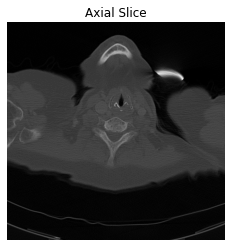

In [ ]:
#Show the first slice.
plt.imshow(vol[0,:,:], cmap='gray')
#Don't show the axis
plt.axis('off')
#Add a title
plt.title('Axial Slice')
plt.show()

Dealing with **stacked slices** is very useful for extracting other planes (**Sagittal**, and **Coronal**). Also, it is **helpful for radiologists** to scroll over multiple slices while diagnosing. But to show the three planes and scroll upon slices correctly, we, **engineers**, have to understand the meaning of the specific attributes. These attributes are **Sampling**, **Shape**, and **Aspect Ratio**.

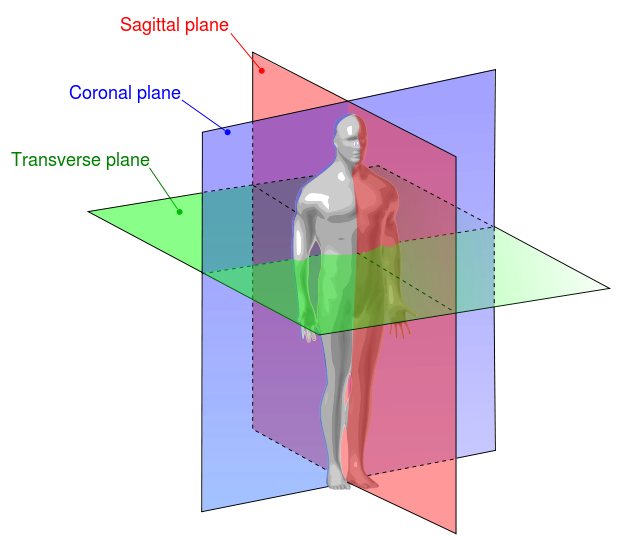

In [ ]:
#Introduce the metadata of the stacked images.
vol.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.397047382026069586801778973091'),
      ('StudyDate', '20100227'),
      ('SeriesDate', '20100227'),
      ('AcquisitionDate', '20100227'),
      ('ContentDate', '20100227'),
      ('StudyTime', '161937.171'),
      ('SeriesTime', '162536.14 '),
      ('AcquisitionTime', '162208.162527 '),
      ('ContentTime', '162208.162527 '),
      ('Modality', 'CT'),
      ('Manufacturer', 'SIEMENS'),
      ('StudyDescription', 'CT CHEST W IV CONTRAST'),
      ('SeriesDescription', 'LUNG 3.0  B70f'),
      ('PatientName', 'C3N-00247'),
      ('PatientID', 'C3N-00247'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'F '),
      ('PatientAge', '077Y'),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.258626612405225511766549337110'),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.24

**Notice** the differences in **"shape"** and **"sampling"** attributes for the stacked images. This is done by ImageIO reading when using (.volread).

### **Understanding "Shape", "Sampling" and "PixelAspectRatio" attributes:**

Let's discuss the three attributes:
> - ***Shape:*** It's simply **the number of rows and columns** in each slice. Since we're dealing with multiple slices, there will be a third dimension equal to the number of slices that are stacked together. In our example, the shape of the stacked images is 99 slices, 512 rows, and 512 columns.

In [3]:
# The shape of the stacked images in each plane
# (Axial, Coronal, and Sagittal, respectively)
n0, n1, n2 = vol.shape
# Print the ouput
print("Number of Slices:\n\t", "Axial=", n0, "Slices\n\t",
                               "Coronal=", n1, "Slices\n\t",
                               "Sagittal=", n2, "Slices")

Number of Slices:
	 Axial= 99 Slices
	 Coronal= 512 Slices
	 Sagittal= 512 Slices


> - ***Sampling:*** If you search for "Sampling" at DICOM Standard, you won't get a direct answer. Because it's a **[special variable](https://github.com/imageio/imageio/blob/c57e31c90f17d32d1b0b1fe8d45a3f274776094d/imageio/plugins/_dicom.py#L451)** built in ImageIO. This Sampling combination of two attributes, **[SliceThickness](https://dicom.innolitics.com/ciods/ct-image/image-plane/00180050)**, and **[PixelSpacing](https://dicom.innolitics.com/ciods/ct-image/image-plane/00280030)**. SliceThickness is simply the nominal slice thickness in mm. As for the PixelSpacing attribute, it's the physical distance, in the patient. It's specified by a **numeric pair**:
 - The **first** value is **the row spacing in mm**, that is the spacing between the centers of adjacent rows, or vertical spacing.
 - The **second** value is **the column spacing in mm**, that is the spacing between the centers of adjacent columns, or horizontal spacing.

  
  The picture below represents the PixelSpacing attribute.



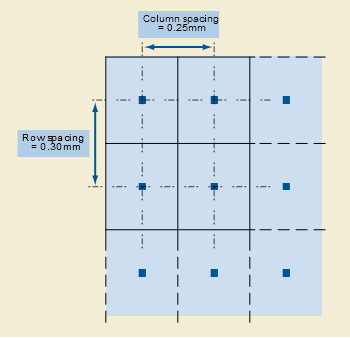

In [4]:
# The sampling of the stacked images in each plane
# (Axial, Coronal, and Sagittal, respectively)
d0, d1, d2 = vol.meta['sampling'] # in mm
# Print the output
print("Sampling:\n\t", "Axial=", d0, "mm\n\t",
                               "Coronal=", d1, "mm\n\t",
                               "Sagittal=", d2, "mm")

Sampling:
	 Axial= 3.0 mm
	 Coronal= 0.564453125 mm
	 Sagittal= 0.564453125 mm


> - ***Pixel Aspect Ratio:*** Ratio of the vertical size and horizontal size of the pixels in the image along a specific axis. Notice that "PixelAspectRatio" is not in the metadata of the stacked images. But that's okay because we can calculate the aspect ratio along each axis by using the "sampling" parameters.  For more information, refer to this [link](https://dicom.innolitics.com/ciods/ct-image/image-pixel/00280034). The image below represents the PixelAspectRatio attribute.

The image below represents the PixelAspectRatio attribute.

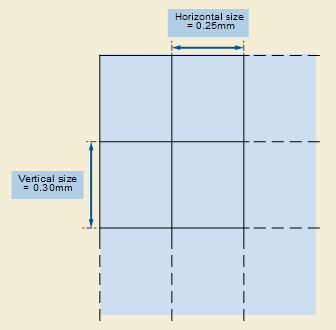


In [5]:
# The aspect ratio along the axial plane
axial_asp = d1/d2
# The aspect ratio along the sagittal plane
sagittal_asp = d0/d1
# The aspect ratio along the coronal plane
coronal_asp = d0/d2
# Print the output
print("Pixel Aspect Ratio:\n\t", "Axial=", axial_asp, "\n\t",
                               "Coronal=", coronal_asp, "\n\t",
                               "Sagittal=", sagittal_asp)

Pixel Aspect Ratio:
	 Axial= 1.0 
	 Coronal= 5.314878892733564 
	 Sagittal= 5.314878892733564


### **Field of View:**

By multiplying the **"shape"** parameters by the **"sampling"** parameters, the physical space in mm, along each axis, we get the **Field of View** along each axis.

In [6]:
print("Field of View:\n\t", "Axial=", n0*d0, "mm\n\t",
                            "Coronal=", n1*d1, "mm\n\t",
                            "Sagittal=", n2*d2, "mm")

Field of View:
	 Axial= 297.0 mm
	 Coronal= 289.0 mm
	 Sagittal= 289.0 mm


### **Building interactive image representation along the axial, coronal, and sagittal planes using Ipywidgets:**

Now, after understanding what **sampling** and **shape** mean, let's use them to do a correct representation of the images with the correct **aspect ratio** along each axis. We'll use **Ipywidgets** to build an **integer** slider which we can scroll between different slices of the specific planes (Axial, Sagittal, or Coronal).

In [ ]:
# Add a slider that starts with 0 and ends at the number of slices along the axial plane, n0=99.
@widgets.interact(axial_slice=(0,n0-1))
# Define the function that shows the images of the specified slice number.
# It starts with the 10th slice. And you can scroll over any slice using the slider.
def axial_slicer(axial_slice=50):
  fig, ax = plt.subplots(1, 1, figsize=(8, 8))
  # Show the image of the specified slice number in 'gray' color-map and axial aspect ratio
  ax.imshow(vol[axial_slice,:,:], cmap='gray', aspect=axial_asp)
  # Don't show the axis
  ax.axis('off')

interactive(children=(IntSlider(value=50, description='axial_slice', max=98), Output()), _dom_classes=('widget…

Now let's show the images of **three slices** each along a specific axis. I **intentionally showed the axes** to easily understand the shape of the slices along each axis.

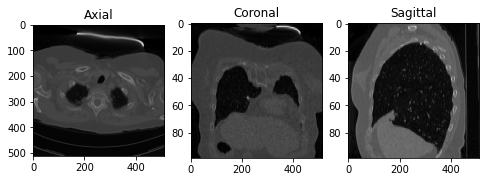

In [ ]:
# Define a figure with 1 row and 3 columns of plots to show
# the images along the three planes
fig, ax = plt.subplots(1, 3, figsize=(8, 8))
# Axial Plane: show the 10th slice
ax[0].imshow(vol[10,:,:], cmap='gray', aspect= axial_asp)
#ax[0].axis('off')
ax[0].set_title('Axial')

# Coronal Plane: show the slice 100
ax[1].imshow(vol[:,100,:],cmap='gray', aspect= coronal_asp)
#ax[1].axis('off')
ax[1].set_title('Coronal')

# Sagittal Plane: show the slice 100
ax[2].imshow(vol[:,:,100], cmap='gray', aspect= sagittal_asp)
#ax[2].axis('off')
ax[2].set_title('Sagittal')
plt.show()

Let's try the ***wrong way***… let's show the images ignoring the aspect ratio of each axis.



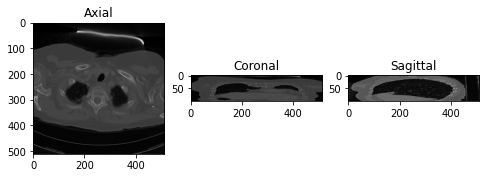

In [ ]:
# Define a figure with 1 row and 3 columns of plots to show the images along the three planes
fig, ax = plt.subplots(1, 3, figsize=(8, 8))
# Axial Plane: show the 10th slice
ax[0].imshow(vol[10,:,:], cmap='gray')
#ax[0].axis('off')
ax[0].set_title('Axial')

# Coronal Plane: show the slice 100
ax[1].imshow(vol[:,100,:],cmap='gray')
#ax[1].axis('off')
ax[1].set_title('Coronal')

# Sagittal Plane: show the slice 100
ax[2].imshow(vol[:,:,100], cmap='gray')
#ax[2].axis('off')
ax[2].set_title('Sagittal')
plt.show()

We can see that only the axial plane is not messy. This is because the argument "aspect" is set to 1 by default, which is the aspect ratio of the axial plane in our case (d1/d2 = 0.564453125 / 0.564453125 = 1).

### **Our Final Code:**
Let's go beyond just one slider with one image plane. We will build a figure of 3 plots that contain the **three planes** (Axial, Coronal, and Sagittal, respectively). We can specify the slice number using the specific slider for each plane. ***Don't forget*** to add the correct aspect ratio so it won't **get messy** just like above.

In [ ]:
# Add three sliders that start with 0 and ends at the number of slices along each plane.
# Axial:    n0=99   slice
# Corornal: n1=512  slice
# Sagittal: n2=512  slice
@widgets.interact(axial_slice=(0,n0-1), coronal_slice=(0,n1-1), sagittal_slice=(0,n2-1))
def slicer(axial_slice, coronal_slice, sagittal_slice=100):
  fig, ax = plt.subplots(1, 3, figsize=(12, 12))

  # Show the specfied slice on the axial plane with 'gray' color-map and axial aspect ratio
  ax[0].imshow(vol[axial_slice,:,:], cmap='gray', aspect= axial_asp)
  ax[0].axis('off')
  ax[0].set_title('Axial')

  # Show the specified slice on the coronal plane with 'gray' color-map and coronal aspect ratio
  ax[1].imshow(vol[:,coronal_slice,:],cmap='gray', aspect= coronal_asp)
  ax[1].axis('off')
  ax[1].set_title('Coronal')

  # Show the specified slice on the sagittal plane with 'gray' color-map and sagittal aspect ratio
  ax[2].imshow(vol[:,:,sagittal_slice], cmap='gray', aspect= sagittal_asp)
  ax[2].axis('off')
  ax[2].set_title('Sagittal')

interactive(children=(IntSlider(value=49, description='axial_slice', max=98), IntSlider(value=255, description…

# **Conclusion:**
> - We've seen how to use the ImageIO package to **read DICOM files**. And the power of using **(.volread)** to stack the images and read them more conveniently.

> - We've learned that a **DICOM file has metadata**, a set of attributes, along with Pixel Data. And we've introduced some of the basics of specific image-related attributes, such as **PixelSapcing**, **SliceThickness**, **Shape**, and **PixelAspectRatio**.

> - We've pointed out **the importance of the aspect ratio** parameter when plotting the images along the axes and how the image gets messy if it's not correctly specified.

> - We've built a figure that shows the specified slice number along the axial, coronal, and sagittal planes using the slider of the **Ipywidgets** package.

# ***Thanks For Reading…***

# **Recommendation:**

> - For more details about DICOM: refer to the previous blog, **[What is DICOM?](https://medium.com/@omar.ok1998/what-is-dicom-a28c5fe24c9d)**

> - **[DICOM Metadata - A Useful Resource for Big Data Analytics](https://healthmanagement.org/c/healthmanagement/issuearticle/dicom-metadata-a-useful-resource-for-big-data-analytics):**
This article provides an overview of new ways to represent data by combining patient access and DICOM information, advanced use of medical imaging metadata, analysis of radiation dose and image segmentation, and deep learning for feature engineering to enrich data.

> - **[Biomedical Image Analysis in Python Course](https://app.datacamp.com/learn/courses/biomedical-image-analysis-in-python) on DataCamp**. This course was my first dive into DICOM images and medical image processing using Python. The information in this blog heavily depends on the first chapter of this course, which is the only free chapter.

> - **[Ipywidget Documentation](https://ipywidgets.readthedocs.io/en/7.6.2/examples/Widget%20Basics.html)** is a good start to learning about building interactive widgets.

# **References:**

[1] DataCamp, First Chapter of [Biomedical Image Analysis in Python Course](https://app.datacamp.com/learn/courses/biomedical-image-analysis-in-python), First Chapter, Exploration.

[2] C. Rossant, [IPython Interactive Computing and Visualization Cookbook](https://ipython-books.github.io/), (2018), [Mastering widgets in the Jupyter Notebook](https://ipython-books.github.io/33-mastering-widgets-in-the-jupyter-notebook/).

[3] ImageIO, GitHub, ImageIO-Plugin-DICOM, (2022), DICOM Attributes, [MINIDICT](https://github.com/imageio/imageio/blob/c57e31c90f17d32d1b0b1fe8d45a3f274776094d/imageio/plugins/_dicom.py#L28).

[4] Innolitics, DICOM Standard Browser, (2022), [Slice Thickness Attribute](https://dicom.innolitics.com/ciods/ct-image/image-plane/00180050).

[5] Innolitics, DICOM Standard Browser, (2022), [Pixel Spacing Attribute](https://dicom.innolitics.com/ciods/ct-image/image-plane/00280030).

[6] Innolitics, DICOM Standard Browser, (2022), [Aspect Ratio Attribute](https://dicom.innolitics.com/ciods/ct-image/image-pixel/00280034).